# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(정답지)

## **Mission 2. 데이터 전처리**

### [미션 이해하기]
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요? 
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


#### <b>[1일차] mission 2 목표<b>: 군집분석을 기반으로 하는 고객 segment 적용 전 주요 데이터 전처리를 수행해보기

#### <b>[실습프로세스]<b>

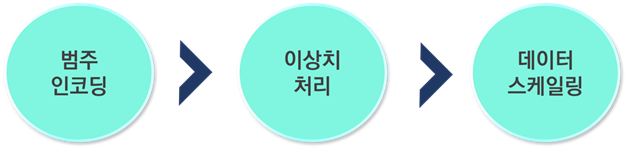

---------------------------------------------------------------------------------------------
## **(1) 범주인코딩**
* 범주형 변수 값(텍스트) 을 수치형 값(숫자)으로 변환하는 방법을 사용하여 알고리즘이 인식할 수 있도록 변환해 봅시다.
* 범주 인코딩 방법은 Label-encoding 과 one-hot-encoding 등이 있습니다.
* 우리는 어떻게 범주 인코딩을 할 수 있을까요?

### **0. 데이터 불러오기**


In [2]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 시각화 표에서 에러나는 부분 글꼴 셋팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [4]:
# [문제 2] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러와서 할당, 인코딩은 cp949
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv',encoding='cp949')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [5]:
# [문제 3] Index화 시키기
# 1. 해당 data 셋에서 'CID'는 활용하지 않을 예정으로 index 화 시켜보자.(함수: set_index 활용)
# 2. 잘 바뀌었는지 data 변수 호출해서 상위 5개 행 확인해보기

data = data.set_index('CID')
data.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


### **1. 활용할 변수 선정하기**

In [6]:
# [문제 4] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.(columns로 확인)

data.columns

Index(['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입',
       '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도',
       '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [20]:
# [문제 5] mission 1에서 선정한 11개의 변수만 가지고 있는 데이터 프레임 생성하기

# 1. data를 data_choice 변수에 copy 해놓기

data_choice = data.copy()

# 2. col 변수에 선정한 11개 변수를 할당해보자.
#[참고] 11개 변수: 'AGE', '고용상태', 'Willingness to pay/Stay', '상품타입',
# '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차'

col= ['AGE', '고용상태', 
      'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액',
      '타 상품 보유 현황', 
      '총지불금액', 
      '거주지사이즈',
      '자동차']

# 3.data_choice 변수에 col 할당 후 data_choice 데이터를 확인해보자.

data_choice = data_choice[col]
data_choice

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,무직,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
2,1,고용,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
3,2,휴직,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
4,5,고용,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
5,4,고용,9.776436,기본,석사,26820200,120,3,947000,중,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11996,1,고용,25.985100,기본,대학졸업,86451000,70,2,245000,중,일반세단
11997,3,고용,3.441000,중급,대학졸업,25962000,80,1,468000,중,일반세단
11998,3,무직,9.057600,중급,대학졸업,0,90,2,977000,중,일반세단


### **2. 범주 인코딩**

   #### **[명목형(텍스트) 컬럼 처리하기]**
   * 순서의 의미가 없는 컬럼은 인코딩 시 주의! 변수의 의미를 고려하여 처리가 필요하다.
   * Mission 1에서 변수마다 탐색적 분석을 통해 의미를 찾아본 것을 활용해야한다.
   * 우리는 1 또는 0으로 이산화(두개의 범주로 구분)를 해보려고 한다.

In [21]:
# [문제 6] 범주형 변수가 무엇이 있는지 확인해보자(info 활용)

data_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


**-> 범주형 변수는 '고용상태', '상품타입', '교육수준', '타 상품 보유 현황'. '거주지 사이즈','자동차'로 총 6개가 있다.**

---------------------------

### **[Hint]**
- ##### **<b>'고용상태', '상품 타입', '교육수준','거주지 사이즈','자동차'</b>** 는 다중범주로 순서에 의미가 없어 변수의 의미를 고려해서  <font color="1E90FF"><b>0과 1로 이산화로 범주 인코딩</font>
- ##### **'타 상품 보유 현황'** 의 경우 숫자로 되어있는 범주에 <font color="1E90FF"><b>'4이상'의 범주의 '이상'이라는 문자열 제거</font>

---------------

#### **1. 고용상태**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 직업을 가지고 있으면서 소득이 발생하는 범주
* 0-> 직업이 없거나, 소득이 발생하지 않는 범주
* 특이하게 false 값 도 존재 하기 때문에 확인 필요

In [22]:
# [문제 7] '고용상태' 범주 확인(crosstab, columns='count' 활용)

pd.crosstab(data_choice['고용상태'],columns='count')

col_0,count
고용상태,
FALSE,360
고용,7518
무직,3028
휴직,1094


In [23]:
# [같이 하기]'고용상태' 범주를 인코딩 해보기
# loc를 활용해서 직업이 없거나, 소득이 발생하지 않는 범주인 'false','무직','휴직'을 0으로 변환
# loc를 활용해서 직업을 가지고 있으면서 소득이 발생하는 범주인 '고용'을 1로 변환

data_choice.loc[data_choice['고용상태'] == 'FALSE','고용상태']=0
data_choice.loc[data_choice['고용상태'] == '무직','고용상태']=0
data_choice.loc[data_choice['고용상태'] == '휴직','고용상태']=0
#----------------------------------------------------------------
data_choice.loc[data_choice['고용상태'] == '고용','고용상태']=1

In [24]:
#[같이 하기] '고용상태'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
2,1,1,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
3,2,0,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
4,5,1,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
5,4,1,9.776436,기본,석사,26820200,120,3,947000,중,SUV


#### **2. 상품타입**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 약 9%를 가지고 있는 고급형
* 0-> 약 91%를 가지고 있는 기본, 중급형 
* 고급형을 가지고 있는 집단과, 그 외 집단으로 분류

In [25]:
# [문제 8] '상품타입' 범주와 비율 확인(crosstab, columns='percentage' 활용)
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.

pd.crosstab(data_choice['상품타입'],columns='percentage',normalize=True)*100

col_0,percentage
상품타입,
고급,8.958333
기본,60.650000
중급,30.391667


In [26]:
# [문제 9]'상품타입'범주를 인코딩 해보기
# loc를 활용해서 '기본,중급'을 0으로 변환/ '고급'을 1로 변환

data_choice.loc[data_choice['상품타입'] == '기본','상품타입']=0
data_choice.loc[data_choice['상품타입'] == '중급','상품타입']=0
#----------------------------------------------------------------
data_choice.loc[data_choice['상품타입'] == '고급','상품타입']=1


In [27]:
#[문제 10] '상품타입'이 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,대학졸업,0,80,1,631000,소,일반세단
2,1,1,6.352530,0,고졸이하,102887400,80,4이상,54000,중,일반세단
3,2,0,4.974354,0,대학졸업,22159500,60,4이상,362000,중,일반세단
4,5,1,13.480284,1,고졸이하,51562500,110,2,1264000,대,컴팩트카
5,4,1,9.776436,0,석사,26820200,120,3,947000,중,SUV


#### **3. 교육수준**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 12%를 가지고 있는 석/박사
* 0-> 약 88%의 비중을 가지고 있는 고졸이하, 대학졸업자
* 교육수준이 높은 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [28]:
#[문제 11] '교육수준' 범주와 비율 확인(crosstab, columns='percentage' 활용)
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.

pd.crosstab(data_choice['교육수준'],columns='percentage',normalize=True)*100

col_0,percentage
교육수준,
고졸이하,28.975000
대학졸업,59.208333
박사,3.658333
석사,8.158333


In [29]:
#[문제 12]'교육수준' 범주를 인코딩 해보기
# loc를 활용해서 '고졸이하, 대학졸업'을 0으로 변환/ '석사,박사'을 1로 변환

data_choice.loc[data_choice['교육수준'] == '고졸이하','교육수준']=0
data_choice.loc[data_choice['교육수준'] == '대학졸업','교육수준']=0
#----------------------------------------------------------------
data_choice.loc[data_choice['교육수준'] == '박사','교육수준']=1
data_choice.loc[data_choice['교육수준'] == '석사','교육수준']=1


In [30]:
#[문제 13] '교육수준'이 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
2,1,1,6.352530,0,0,102887400,80,4이상,54000,중,일반세단
3,2,0,4.974354,0,0,22159500,60,4이상,362000,중,일반세단
4,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
5,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV


#### **4. 타 상품 보유 현황**
<font color="1E90FF"><b>★ 범주의 1-4까지가 의미를 가지는 범주를 인코딩 해보자.</font>
* 4 이상의 타상품 보유하는 경우 유의미한 데이터로 가질 수 있어 순서의 의미를 살려서 인코딩 진행

In [31]:
#[문제 14] '타 상품 보유 현황' 범주와 비율 확인(crosstab, columns='percentage' 활용)
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.

pd.crosstab(data_choice['타 상품 보유 현황'],columns='percentage',normalize=True)*100

col_0,percentage
타 상품 보유 현황,
1,35.691667
2,25.141667
3,12.875000
4이상,26.291667


In [32]:
# [문제 15] 문자열 제거 하기 
# '타 상품 보유 현황'은 숫자형 이지만, 4이상의 '이상'이라는 문자열을 제거해서 정리가 필요
#  replace 함수를 써서 '4이상'을 숫자 4로 바꿔보자.(inplace = True로 적용)

data_choice.replace({'타 상품 보유 현황':{'4이상':'4'}},inplace=True)


In [33]:
#[문제 16]'타 상품 보유 현황'이 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
2,1,1,6.352530,0,0,102887400,80,4,54000,중,일반세단
3,2,0,4.974354,0,0,22159500,60,4,362000,중,일반세단
4,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
5,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV


#### **5. 거주지 사이즈**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 10%를 가지고 있는 거주지 대
* 0-> 약 90%를 가지고 있는 중,소 
* 거주지의 사이즈가 대로 가지고 있는 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [34]:
#[문제 17] '거주지사이즈' 범주와 비율 확인(crosstab, columns='percentage' 활용)
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.

pd.crosstab(data_choice['거주지사이즈'],columns='percentage',normalize=True)*100

col_0,percentage
거주지사이즈,
대,10.375000
소,19.433333
중,70.191667


In [35]:
#[문제 18]'거주지사이즈' 범주를 인코딩 해보기
# loc를 활용해서 '중,소'를 0으로 변환/ '대'를 1로 변환

data_choice.loc[data_choice['거주지사이즈'] == '중','거주지사이즈']=0
data_choice.loc[data_choice['거주지사이즈'] == '소','거주지사이즈']=0
#----------------------------------------------------------------
data_choice.loc[data_choice['거주지사이즈'] == '대','거주지사이즈']=1

In [36]:
#[문제 19]'거주지사이즈'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,0,일반세단
2,1,1,6.352530,0,0,102887400,80,4,54000,0,일반세단
3,2,0,4.974354,0,0,22159500,60,4,362000,0,일반세단
4,5,1,13.480284,1,0,51562500,110,2,1264000,1,컴팩트카
5,4,1,9.776436,0,1,26820200,120,3,947000,0,SUV


#### **6. 자동차**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 9%를 가지고 있는 고급차/스포츠카
* 0-> 약 91%를 가지고 있는 그외(일반세단, 컴팩트카,suv) 
* 고급형(고급차.스포츠카)와 그 외의 집단으로 분류할 수 있을 것 같음(소득에 연관)

In [37]:
#[문제 20] '자동차' 범주와 비율 확인(crosstab, columns='percentage' 활용)
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.

pd.crosstab(data_choice['자동차'],columns='percentage',normalize=True)*100

col_0,percentage
자동차,
SUV,19.466667
고급차,3.783333
스포츠카,5.433333
일반세단,50.616667
컴팩트카,20.700000


In [38]:
#[문제 21]'자동차' 범주를 인코딩 해보기
# loc를 활용해서 일반세단, 컴팩트카,suv 를 0으로/ 고급차,스포츠카를 1로 변환

data_choice.loc[data_choice['자동차'] == 'SUV','자동차']=0
data_choice.loc[data_choice['자동차'] == '일반세단','자동차']=0
data_choice.loc[data_choice['자동차'] == '컴팩트카','자동차']=0
#----------------------------------------------------------------
data_choice.loc[data_choice['자동차'] == '고급차','자동차']=1
data_choice.loc[data_choice['자동차'] == '스포츠카','자동차']=1


In [39]:
#[문제 22] '자동차'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,0,0
2,1,1,6.352530,0,0,102887400,80,4,54000,0,0
3,2,0,4.974354,0,0,22159500,60,4,362000,0,0
4,5,1,13.480284,1,0,51562500,110,2,1264000,1,0
5,4,1,9.776436,0,1,26820200,120,3,947000,0,0


### <font color="1E90FF"><b> 범주형(Object) -> 수치형으로 변경 완료!</span>

---------------------------------------------------------------------------------------------
## **(2) 이상치 처리**
* 수치형 컬럼을 처리하면서 이상치가 존재하면, 이상치를 삭제/대체 하는 것이 데이터 모델링에 좋은 방향!
* 이상치 처리는 어떻게 해야할까?

#### **[수치형 컬럼 처리하기]**
* **Z-SCORE 기반 이상치 대체 처리해보기**

><b>z-score란?(z값)</b> 
<br> - 표준편차를 단위로 보았을 때 측정치가 평균에서 얼마만큼 일탈 하였는가를 보는 것 ! 
<br> - 그렇기 때문에 측정값이 얼마나 통계적으로 떨어져 있는지 구할 수 있고 이상치를 처리할 수 있다.
<br>
> - z-score를 통해서 계산하면 좋은 점은 각 데이터의 단위가 다르더라도 동일 선상에서 얼만큼 평균에서 떨어져 있는지 같은 z-score 기준으로 변환해서 판단 가능하다.

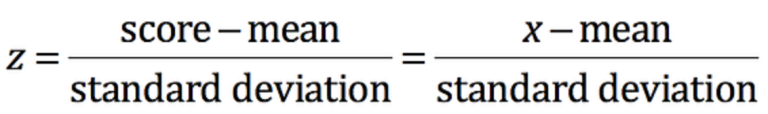

In [40]:
# [문제 23] 수치형 변수가 무엇이 있는지 확인해보자(info 활용)

data_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


**-> 수치형 변수는 'AGE','WTP','소득','월 납입액','총지불금액'으로 총 5개가 있다.**
<font color ="red"><BR><b>
* 단, AGE의 경우 기본적인 정보라서 이상치가 없을 것으로 제외</font> 
<font color ="red"><BR><b>
* WTP(Willingness to pay/Stay)의 경우, 
<br>기업에서 사전 정의/개발된 지표의 값 이므로 이상치 처리 대상에서 제외하고 진행</font>
<br> 결론적으로, '소득', '월납입액', '총 지불 금액' 3개의 항목만 이상치 처리를 해보자!

--------

#### **0. boxplot으로 이상치 확인해보기**

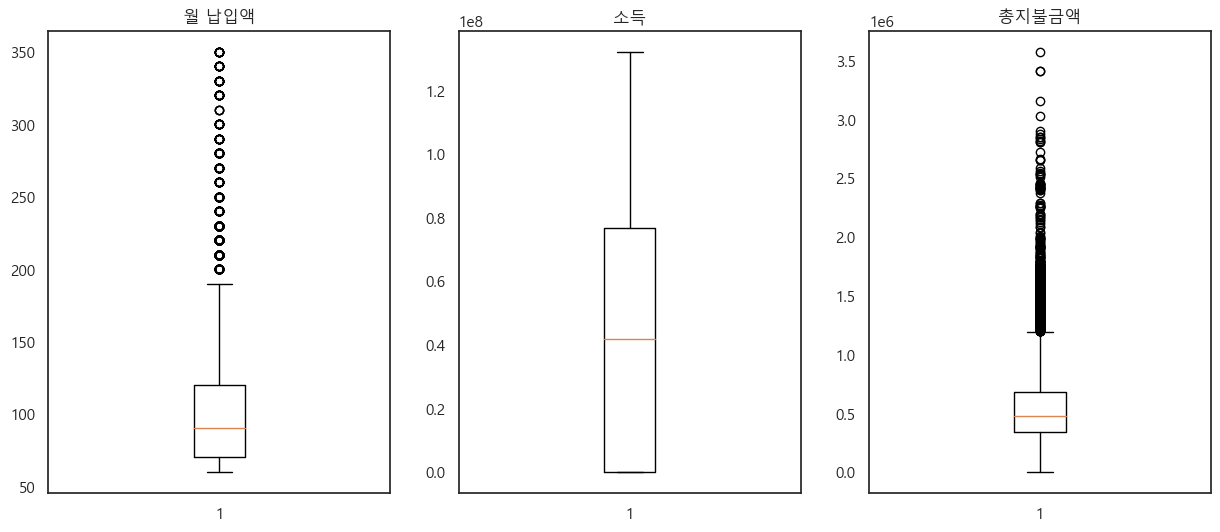

In [41]:
# [문제 24] boxplot을 활용해서 이상치 여부를 확인해보기
# boxplot 에서 통계적으로 1.5 IQR을 벗어나면 이상치로 판단
# 월납입액, 소득, 총 지불 금액을 boxplot으로 확인해 보기
# 아래처럼 하려면 subplot을 활용해서 하면 된다!(ex.plt.subplot(1,3,1))

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(data_choice['월 납입액'])
plt.title('월 납입액')

plt.subplot(1,3,2)
plt.boxplot(data_choice['소득'])
plt.title('소득')

plt.subplot(1,3,3)
plt.boxplot(data_choice['총지불금액'])
plt.title('총지불금액')

plt.show()

#### **1. Z-SCORE를 기반한 이상치 처리**

* z-score를 기반해서 이상치를 처리하는 방법은 2가지가 있다.
1. spicy를 활용해서 z-score로 값 변경 후 이상치 범위에 있는 값들 삭제/대체 하는 방법
2. z-score 수식과 같이 numpy로 mean, std를 이용해서 계산하고 이상치 범위에 있는 값들 삭제/대체하는 방법

##### **1) spicy 활용해서 z-score 변환**

In [42]:
# [같이 하기] spicy 활용해서 z-score 변환하여 확인해보기

# 1. spicy 임포트 하기

import scipy.stats as sp

# 2. 소득, 월납입액, 총지불금액을 z-score로 변환한 열을 데이터 프레임에 추가하기
#   (ex. '소득' -> '소득_z')

data_choice['소득_z'] =sp.zscore(data_choice['소득'])
data_choice['월 납입액_z'] =sp.zscore(data_choice['월 납입액'])
data_choice['총지불금액_z'] =sp.zscore(data_choice['총지불금액'])


In [43]:
#[같이 하기] 변환 완료된 것 중 '소득_z' 확인 해 보기

data_choice['소득_z']

CID
1       -1.242413
2        1.511484
3       -0.649289
4        0.137715
5       -0.524540
           ...   
11996    1.071545
11997   -0.547511
11998   -1.242413
11999   -0.536698
12000   -1.242413
Name: 소득_z, Length: 12000, dtype: float64

##### **2) z-score 수식 활용해서 z-score 변환**

In [44]:
# [같이 하기] z-score 수식 활용 해서 z-score로 변환해보기
# 1번 방식과의 비교를 위해 소득 변수만 활용해 보기
# z(소득) = x(소득) - mean(소득) / std(소득)

data_choice['소득_z'] = (data_choice['소득'] - np.mean(data_choice['소득'])) / np.std(data_choice['소득'])

In [45]:
#[같이 하기]변환 완료된 것 중 '소득_z' 확인 해 보기

data_choice['소득_z']

CID
1       -1.242413
2        1.511484
3       -0.649289
4        0.137715
5       -0.524540
           ...   
11996    1.071545
11997   -0.547511
11998   -1.242413
11999   -0.536698
12000   -1.242413
Name: 소득_z, Length: 12000, dtype: float64

**-> 같은 z-score 값이 나오는 것을 확인 할 수 있다! 이중에서 편한 걸로 해보자!**

------------

##### **3)이상치 검토 하기**

In [46]:
#[문제 25] z-score 관련 변수의 통계 값들을 확인해보자.('소득_z','월 납입액_z','총지불금액_z')

data_choice[['소득_z','월 납입액_z','총지불금액_z']].describe()

,소득_z,월 납입액_z,총지불금액_z
count,1.200000e+04,1.200000e+04,1.200000e+04
mean,-5.447494e-17,6.039613e-17,1.119105e-16
std,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.242413e+00,-9.437918e-01,-1.492778e+00
25%,-1.242413e+00,-7.082316e-01,-5.562824e-01
50%,-1.219190e-01,-2.371110e-01,-1.716502e-01
75%,8.089829e-01,4.695698e-01,3.997236e-01
max,2.291275e+00,5.887456e+00,8.465851e+00


### **[이상치 기준]**

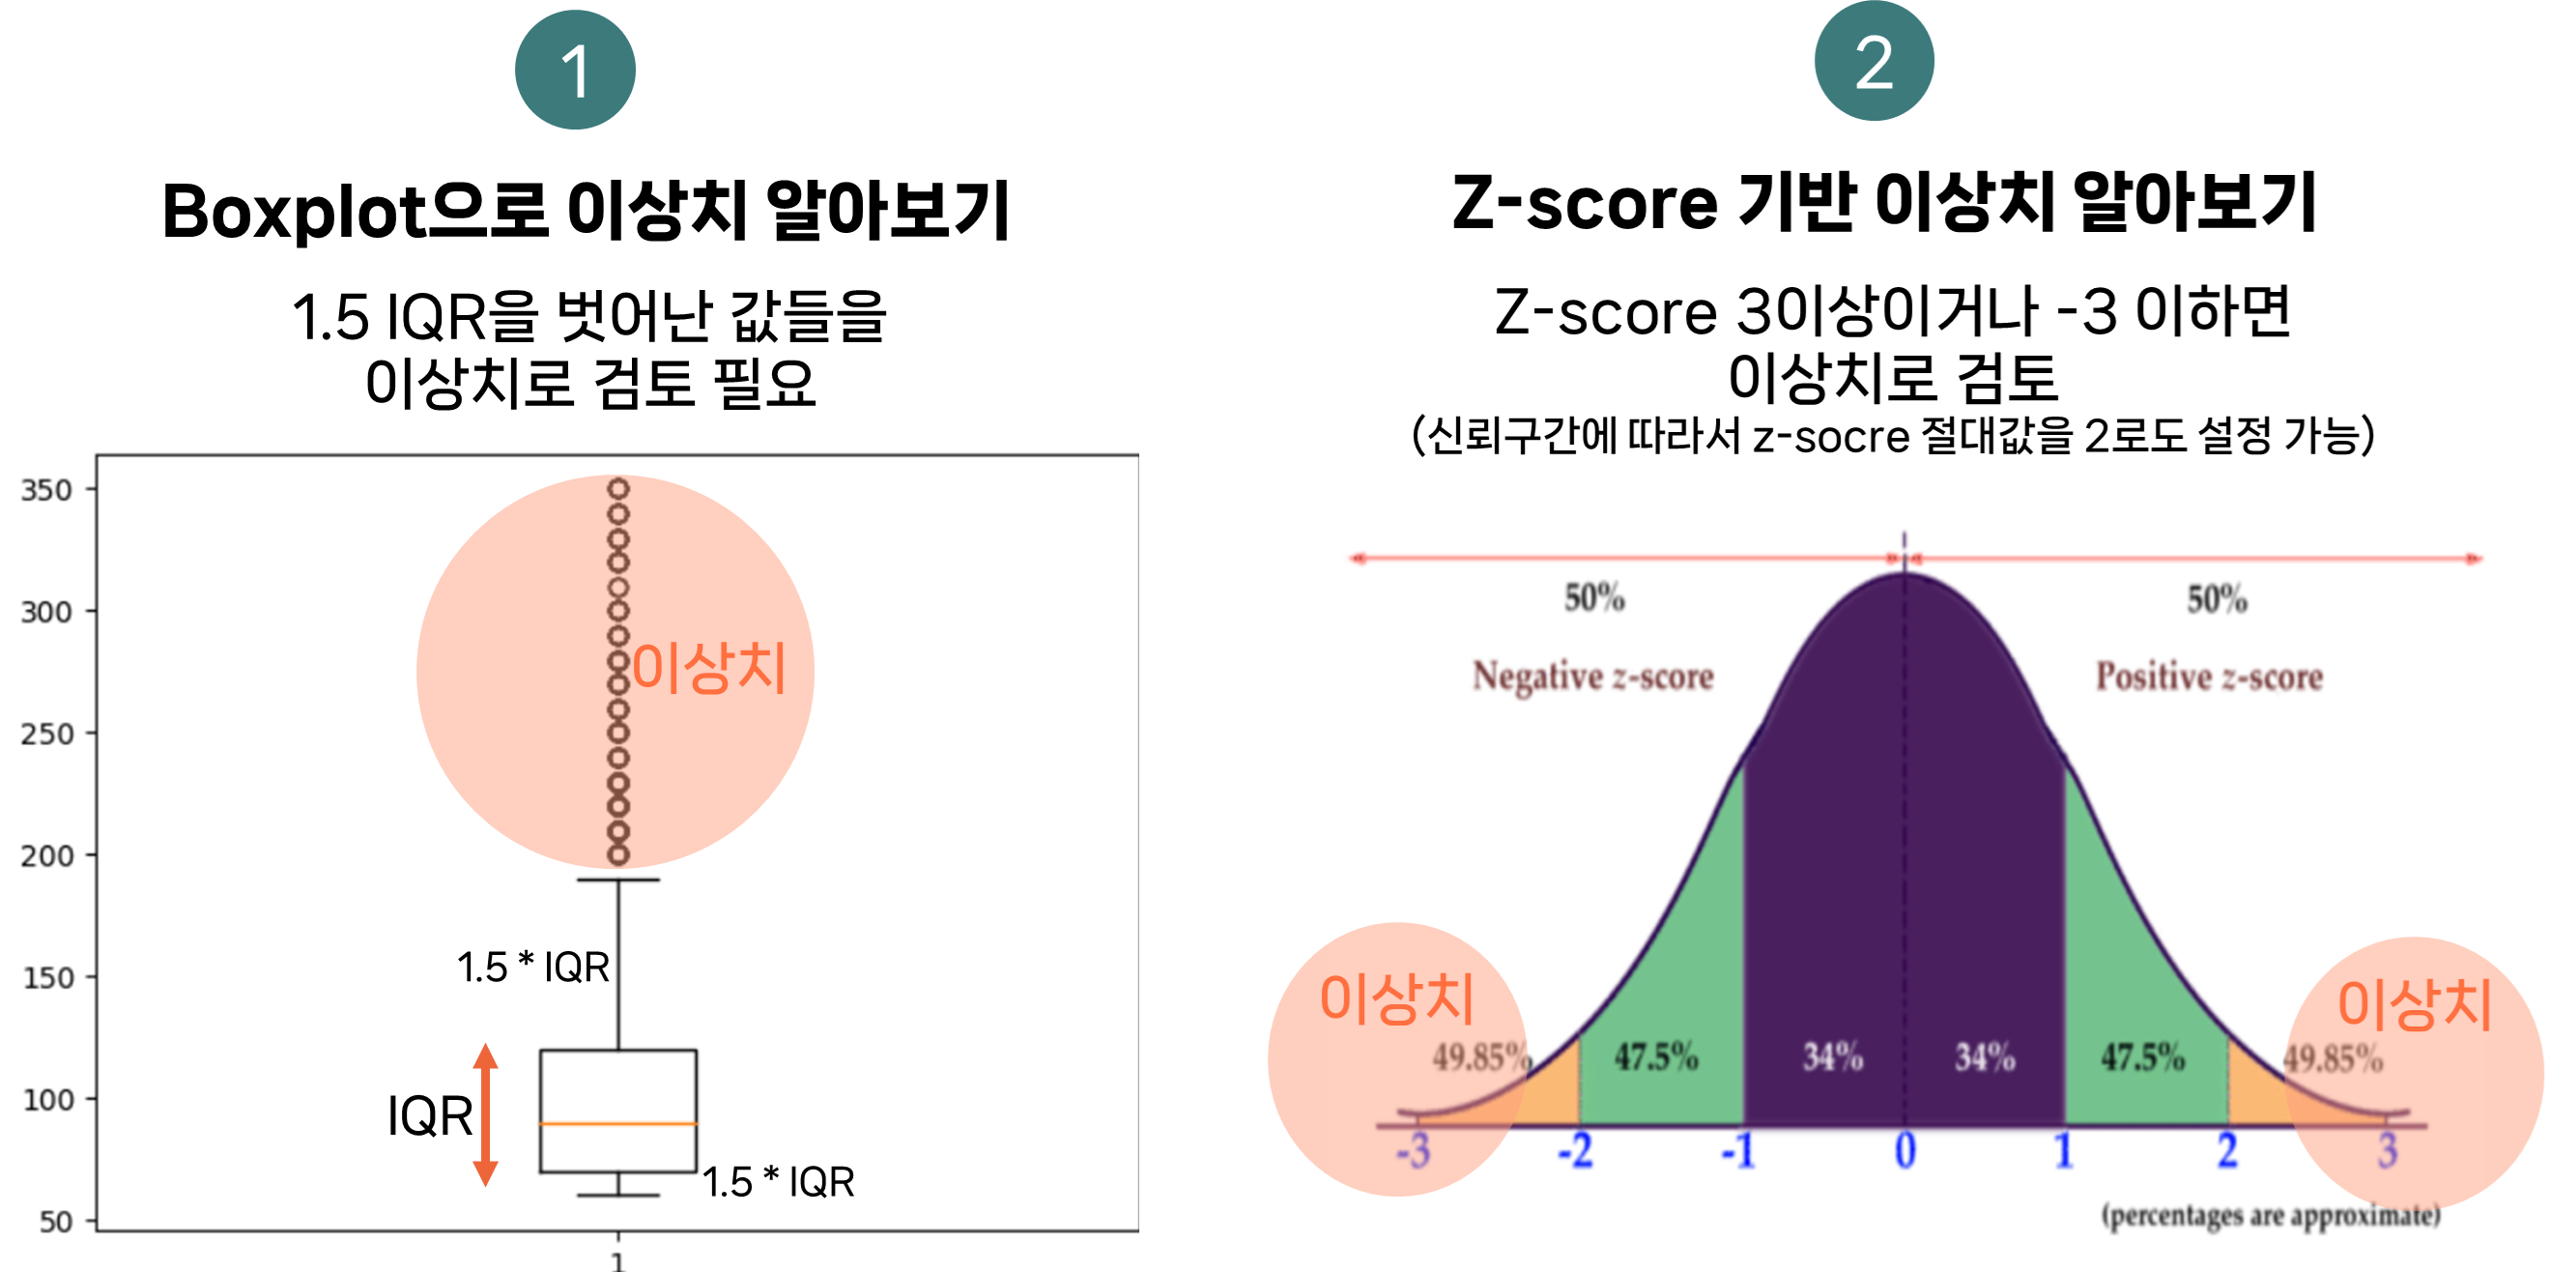

위의 그림과 같이 **z-score가 3이상이거나 -3 이하**이면 이상치로 검토합니다.
<br>판단 해야하는 3개 변수(소득,월납입액, 총지불금액)의 z-score가 3 이상이거나 -3이하인 값이 있는지 체크해 봅시다!

그리고 이상치의 최소값들을 찾아봅시다!

In [47]:
#[같이 하기] '월납입액' 이상치 기준 판단을 단계별로 차근차근 해보기

# 1. 절대값으로 z-score 가 3이상이거나 -3이하인 값을 찾아서 a에 넣기(true, false 값으로 나옴)
a = (abs(data_choice['월 납입액_z'])>=3) 

# 2. a 값 확인
print(a)

# 3. 데이터 프레임에서 a에 true에 해당되는 값들을 찾아서 a1으로 리스트업
a1= data_choice[a]['월 납입액']

# 4. a1 값 확인
print('==============')
print(a1)

# 5. a1 값 중에서 최소값을 찾아서 a2에 넣기
a2 = np.min(a1)

# 6. a2 값 확인하기
print('==============')
print("*월 납입액 이상치 최소값:",a2)


CID
1        False
2        False
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: 월 납입액_z, Length: 12000, dtype: bool
CID
21       230
77       310
198      240
219      270
349      230
        ... 
11778    340
11787    230
11810    290
11893    250
11916    320
Name: 월 납입액, Length: 295, dtype: int64
*월 납입액 이상치 최소값: 230


In [48]:
# 위의 6단계를 변수 할당 없이 한 줄에 적게 되면?

print("*월 납입액 이상치 최소값:",np.min(data_choice[(abs(data_choice['월 납입액_z'])>=3)]['월 납입액']))

*월 납입액 이상치 최소값: 230


In [49]:
#[문제 26] '소득' 이상치 기준 판단을 단계별로 차근차근 해보기

# 1. 절대값으로 z-score 가 3이상이거나 -3이하인 값을 찾아서 a에 넣기(true, false 값으로 나옴)
a = (abs(data_choice['소득_z'])>=3) 

# 2. a 값 확인
print(a)

# 3. 데이터 프레임에서 a에 true에 해당되는 값들을 찾아서 a1으로 리스트업
a1= data_choice[a]['소득']

# 4. a1 값 확인
print('==============')
print(a1)

# 5. a1 값 중에서 최소값을 찾아서 a2에 넣기
a2 = np.min(a1)

# 6. a2 값 확인하기
print('==============')
print("*소득 이상치 최소값:",a2)

CID
1        False
2        False
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: 소득_z, Length: 12000, dtype: bool
Series([], Name: 소득, dtype: int64)
*소득 이상치 최소값: nan


In [50]:
# [문제 27] 위'소득' 이상치 기준 판단을 변수 할당 없이 한줄로 적어보자.

print("*소득 이상치 최소값:",np.min(data_choice[(abs(data_choice['소득_z'])>=3)]['소득']))

*소득 이상치 최소값: nan


In [51]:
#[문제 28] '총지불금액' 이상치 기준 판단을 단계별로 차근차근 해보기

# 1. 절대값으로 z-score 가 3이상이거나 -3이하인 값을 찾아서 a에 넣기(true, false 값으로 나옴)
a = (abs(data_choice['총지불금액_z'])>=3) 

# 2. a 값 확인
print(a)

# 3. 데이터 프레임에서 a에 true에 해당되는 값들을 찾아서 a1으로 리스트업
a1= data_choice[a]['총지불금액']

# 4. a1 값 확인
print('==============')
print(a1)

# 5. a1 값 중에서 최소값을 찾아서 a2에 넣기
a2 = np.min(a1)

# 6. a2 값 확인하기
print('==============')
print("*총지불금액 이상치 최소값:",a2)

CID
1        False
2        False
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: 총지불금액_z, Length: 12000, dtype: bool
CID
66       2289000
77       3408000
136      1781000
198      1823000
218      1627000
          ...   
11790    2146000
11810    1632000
11916    3029000
11970    1642000
11992    2409000
Name: 총지불금액, Length: 211, dtype: int64
*총지불금액 이상치 최소값: 1612000


In [52]:
#[문제 29] 위 '총지불금액' 이상치 기준 판단을 변수 할당 없이 한줄로 적어보자.

print("*총 지불 금액 이상치 최소값:",np.min(data_choice[(abs(data_choice['총지불금액_z'])>=3)]['총지불금액']))

*총 지불 금액 이상치 최소값: 1612000


In [53]:
#[문제 30] 3개 변수를 한번에 확인해 봅시다.(변수 할당 없이 한줄로 적은 코드 활용!)

print("소득 이상치 최소값(기준):",np.min(data_choice[(abs(data_choice['소득_z'])>=3)]['소득']))
print("월 납입액 이상치 최소값(기준):",np.min(data_choice[(abs(data_choice['월 납입액_z'])>=3)]['월 납입액']))
print("총 지불 금액 이상치 최소값(기준):",np.min(data_choice[(abs(data_choice['총지불금액_z'])>=3)]['총지불금액']))


소득 이상치 최소값(기준): nan
월 납입액 이상치 최소값(기준): 230
총 지불 금액 이상치 최소값(기준): 1612000


-------------

##### **4)이상치 대체하기**

In [55]:
#[문제 31] 활용 변수 3개의 최대값들 확인 하기(z-score 값 아닌 '소득','월 납입액','총지불금액')
data_choice[['소득','월 납입액','총지불금액']].describe()

,소득,월 납입액,총지불금액
count,1.200000e+04,12000.000000,1.200000e+04
mean,4.641737e+07,100.065833,5.355854e+05
std,3.736221e+07,42.453750,3.587993e+05
min,0.000000e+00,60.000000,0.000000e+00
25%,0.000000e+00,70.000000,3.360000e+05
50%,4.186240e+07,90.000000,4.740000e+05
75%,7.664150e+07,120.000000,6.790000e+05
max,1.320209e+08,350.000000,3.573000e+06


In [56]:
# [같이 하기] 1. '월 납입액' 이상치를 대체하기
# 데이터를 최대한 활용해보기 위해 이상치 처리를 위에서 찾은 이상치의 최소값으로 대체해 보자.
# loc를 활용해서 기준 값(최소값) 이상은 제외하고 데이터 프레임에 넣어봅시다.

data_choice.loc[data_choice['월 납입액']>=230,'월 납입액'] =230

In [57]:
#[같이 하기] 대체한 값을 describe로 확인해보자.

data_choice[['월 납입액']].describe()

,월 납입액
count,12000.000000
mean,99.191667
std,38.852573
min,60.000000
25%,70.000000
50%,90.000000
75%,120.000000
max,230.000000


In [58]:
#[문제 32] 2. '총 지불금액' 이상치를 대체하기
# 데이터를 최대한 활용해보기 위해 이상치 처리를 위에서 찾은 이상치의 최소값으로 대체해 보자.
# loc를 활용해서 기준 값(최소값) 이상은 제외하고 데이터 프레임에 넣어봅시다.

data_choice.loc[data_choice['총지불금액']>=1612000,'총지불금액'] =1612000

In [59]:
#[문제 33] 대체한 값을 describe로 확인해보자.

data_choice[['총지불금액']].describe()

,총지불금액
count,1.200000e+04
mean,5.293022e+05
std,3.319154e+05
min,0.000000e+00
25%,3.360000e+05
50%,4.740000e+05
75%,6.790000e+05
max,1.612000e+06


In [60]:
#[문제 34] 3.'소득'의 이상치 처리하기
# 소득의 이상치는 없는 것으로 확인 되었다. 하지만 mission 1 에서 소득이 아예 없는 고객이 많았다.
# 소득을 이산화 인코딩 해서 데이터를 활용하면 좋을 것 같다고 판단하였다.(mission 1 코드 활용해보기!)

# 1. 소득 0은 0으로 변환
data_choice.loc[data_choice['소득'] == 0,'소득']=0

# 2. 소득 0 초과는 1으로 변환
data_choice.loc[data_choice['소득'] > 0,'소득']=1


In [61]:
#[문제 35] 대체한 값을 describe로 확인해보자.

data_choice[['소득']].describe()

,소득
count,12000.000000
mean,0.747667
std,0.434370
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [62]:
# [문제 36] 수치 확인용 z-score 컬럼을 삭제해보자
# drop -> '소득_z','월 납입액_z','총지불금액_z'
# 그리고 'data_choice_n' 데이터 프레임에 넣어보자 

data_choice_n = data_choice.drop(['소득_z','월 납입액_z','총지불금액_z'],axis=1)
data_choice_n

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,0,0
2,1,1,6.352530,0,0,1,80,4,54000,0,0
3,2,0,4.974354,0,0,1,60,4,362000,0,0
4,5,1,13.480284,1,0,1,110,2,1264000,1,0
5,4,1,9.776436,0,1,1,120,3,947000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11996,1,1,25.985100,0,0,1,70,2,245000,0,0
11997,3,1,3.441000,0,0,1,80,1,468000,0,0
11998,3,0,9.057600,0,0,0,90,2,977000,0,0


#### <font color="1E90FF"><b> -> data가 전부 숫자형으로 변경 된 것을 확인할 수 있다!</font>

In [63]:
#[문제 37] 'data_choice_n' 데이터프레임 정보를 다시 한번 확인해보자(info)

data_choice_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [64]:
# [문제 38] 타입 변환을 해보자. 
# 데이터 안의 정보는 수치형이지만 dtype은 아직 object 이다. 범주형을 수치형으로 변경해 주자!
# astype-> float64 활용해서 변경 후 확인

data_choice_n = data_choice_n.astype('float64')
data_choice_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  float64
 1   고용상태                     12000 non-null  float64
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  float64
 4   교육수준                     12000 non-null  float64
 5   소득                       12000 non-null  float64
 6   월 납입액                    12000 non-null  float64
 7   타 상품 보유 현황               12000 non-null  float64
 8   총지불금액                    12000 non-null  float64
 9   거주지사이즈                   12000 non-null  float64
 10  자동차                      12000 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


In [65]:
# [문제 39] 잘 변환 되었는지 다시 한번 'data_choice_n' 확인 해보자.

data_choice_n

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3.0,0.0,2.616381,0.0,0.0,0.0,80.0,1.0,631000.0,0.0,0.0
2,1.0,1.0,6.352530,0.0,0.0,1.0,80.0,4.0,54000.0,0.0,0.0
3,2.0,0.0,4.974354,0.0,0.0,1.0,60.0,4.0,362000.0,0.0,0.0
4,5.0,1.0,13.480284,1.0,0.0,1.0,110.0,2.0,1264000.0,1.0,0.0
5,4.0,1.0,9.776436,0.0,1.0,1.0,120.0,3.0,947000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11996,1.0,1.0,25.985100,0.0,0.0,1.0,70.0,2.0,245000.0,0.0,0.0
11997,3.0,1.0,3.441000,0.0,0.0,1.0,80.0,1.0,468000.0,0.0,0.0
11998,3.0,0.0,9.057600,0.0,0.0,0.0,90.0,2.0,977000.0,0.0,0.0


------

## **(3) 스케일링(Min-Max Scaling)**
* 컬럼별 수치의 단위가 다른 것을 확인 하였고, 컬럼별 단위 변환이 필요한 상황이다.
* 단위를 일원화 시키기 위해서는 스케일링이 필요로 하다.
* 종류는 'min-max scaling' 과 'standard scaling' 이 있는데 우리는 'min-max scaling'을 통해서 변환 해보자.

### [min-max scaling 과 standard scaling]
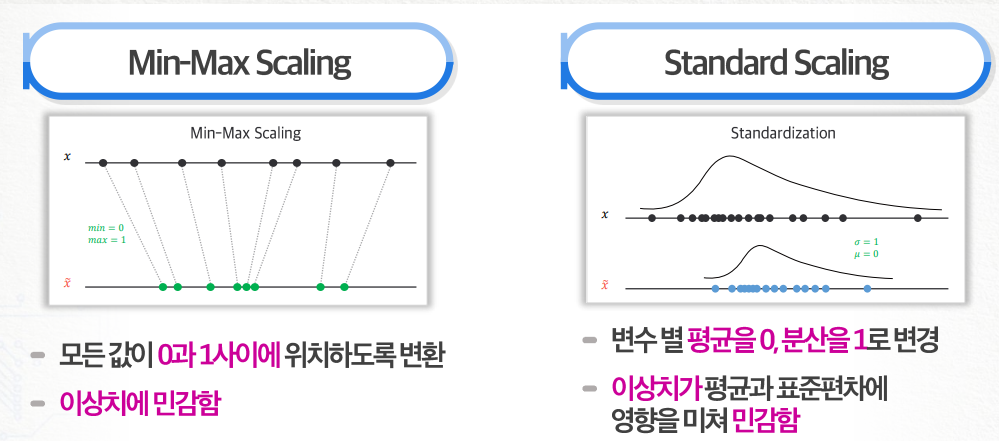

In [66]:
#[문제 40] min-max-scaling을 해보자.

# 1. min-max-scaler & standard-scaler import!(sklearn의 processing 활용)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 2. scaler라는 변수에 MinMaxScaler 넣어주기

scaler = MinMaxScaler()

# 3. 'data_choice_n'을 'scaler_data' 변수에 fit-transform으로 fit 하기!

scaler_data = pd.DataFrame(scaler.fit_transform(data_choice_n))

# 4. 컬럼은 이전 dataframe('data_choice_n') 에서 그대로 가져와서 'scaler_data.columns'에 할당하기

scaler_data.columns =  data_choice_n.columns

In [67]:
# [문제 41] 스케일링이 잘 되었는지 'scaler_data' 데이터를 확인해보자

scaler_data

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,0.4,0.0,0.006309,0.0,0.0,0.0,0.117647,0.000000,0.391439,0.0,0.0
1,0.0,1.0,0.047615,0.0,0.0,1.0,0.117647,1.000000,0.033499,0.0,0.0
2,0.2,0.0,0.032378,0.0,0.0,1.0,0.000000,1.000000,0.224566,0.0,0.0
3,0.8,1.0,0.126418,1.0,0.0,1.0,0.294118,0.333333,0.784119,1.0,0.0
4,0.6,1.0,0.085469,0.0,1.0,1.0,0.352941,0.666667,0.587469,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,1.0,0.264668,0.0,0.0,1.0,0.058824,0.333333,0.151985,0.0,0.0
11996,0.4,1.0,0.015426,0.0,0.0,1.0,0.117647,0.000000,0.290323,0.0,0.0
11997,0.4,0.0,0.077522,0.0,0.0,0.0,0.176471,0.333333,0.606079,0.0,0.0
11998,0.6,1.0,0.069668,0.0,0.0,1.0,0.235294,0.666667,0.529777,1.0,0.0


In [68]:
#[문제 42] 데이터 내보내기
# 2일차에 모델링에 활용하기 위해 내보내기를 해보자.
# scaler_data 변수를 scaler_data.csv 파일로 저장(to_csv 활용)
# index=False 파라미터를 설정해 줘야지 unnamed:0번 추가 인덱스가 안생기기에 꼭! 넣어서 저장!

scaler_data.to_csv('scaler_data.csv',index=False)

In [69]:
#[문제 43] 데이터가 잘 들어갔는지 read_csv 활용해서 'scaler_data.csv' 확인

pd.read_csv('scaler_data.csv')

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,0.4,0.0,0.006309,0.0,0.0,0.0,0.117647,0.000000,0.391439,0.0,0.0
1,0.0,1.0,0.047615,0.0,0.0,1.0,0.117647,1.000000,0.033499,0.0,0.0
2,0.2,0.0,0.032378,0.0,0.0,1.0,0.000000,1.000000,0.224566,0.0,0.0
3,0.8,1.0,0.126418,1.0,0.0,1.0,0.294118,0.333333,0.784119,1.0,0.0
4,0.6,1.0,0.085469,0.0,1.0,1.0,0.352941,0.666667,0.587469,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,1.0,0.264668,0.0,0.0,1.0,0.058824,0.333333,0.151985,0.0,0.0
11996,0.4,1.0,0.015426,0.0,0.0,1.0,0.117647,0.000000,0.290323,0.0,0.0
11997,0.4,0.0,0.077522,0.0,0.0,0.0,0.176471,0.333333,0.606079,0.0,0.0
11998,0.6,1.0,0.069668,0.0,0.0,1.0,0.235294,0.666667,0.529777,1.0,0.0


## **[Mission 2-데이터 전처리 결론]**

* 군집화 모델링을 하기 위해 범주형,수치형별 데이터 전처리가 필요했고 전처리 진행 완료
* 범주형은 수치형으로 변환을 하기 위해 인코딩 과정을 진행
* 수치형은 이상치를 확인하여 처리하고, 단위가 각각 다른 수치형을 스케일링을 통해 모델 적용을 위한 기본 셋팅으로 변환

### <font color="1E90FF"><b>→ 모델을 돌리기 전 데이터에 대한 이해도를 바탕으로 데이터의 전처리 진행(이상치처리,스케일링)<b><br>  

# <b>Mission 2 완료!
수고하셨습니다!